## import useful packages

In [90]:
import os
import wget
if os.path.isfile("utilsLaris.py")==True:
    os. remove("utilsLaris.py")
wget.download("https://raw.githubusercontent.com/Ah-essabar/LARIS01/master/utilsLaris.py")

import janitor
import os
import glob
import mitosheet
import ipywidgets as widgets
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

from sklearn.model_selection import cross_val_score


%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

In [92]:
# read exported data
index_col="date"
data=pd.read_csv('df_219_mars_31_mai.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col, parse_dates=True)
data.shape

(24072, 94)

<AxesSubplot:>

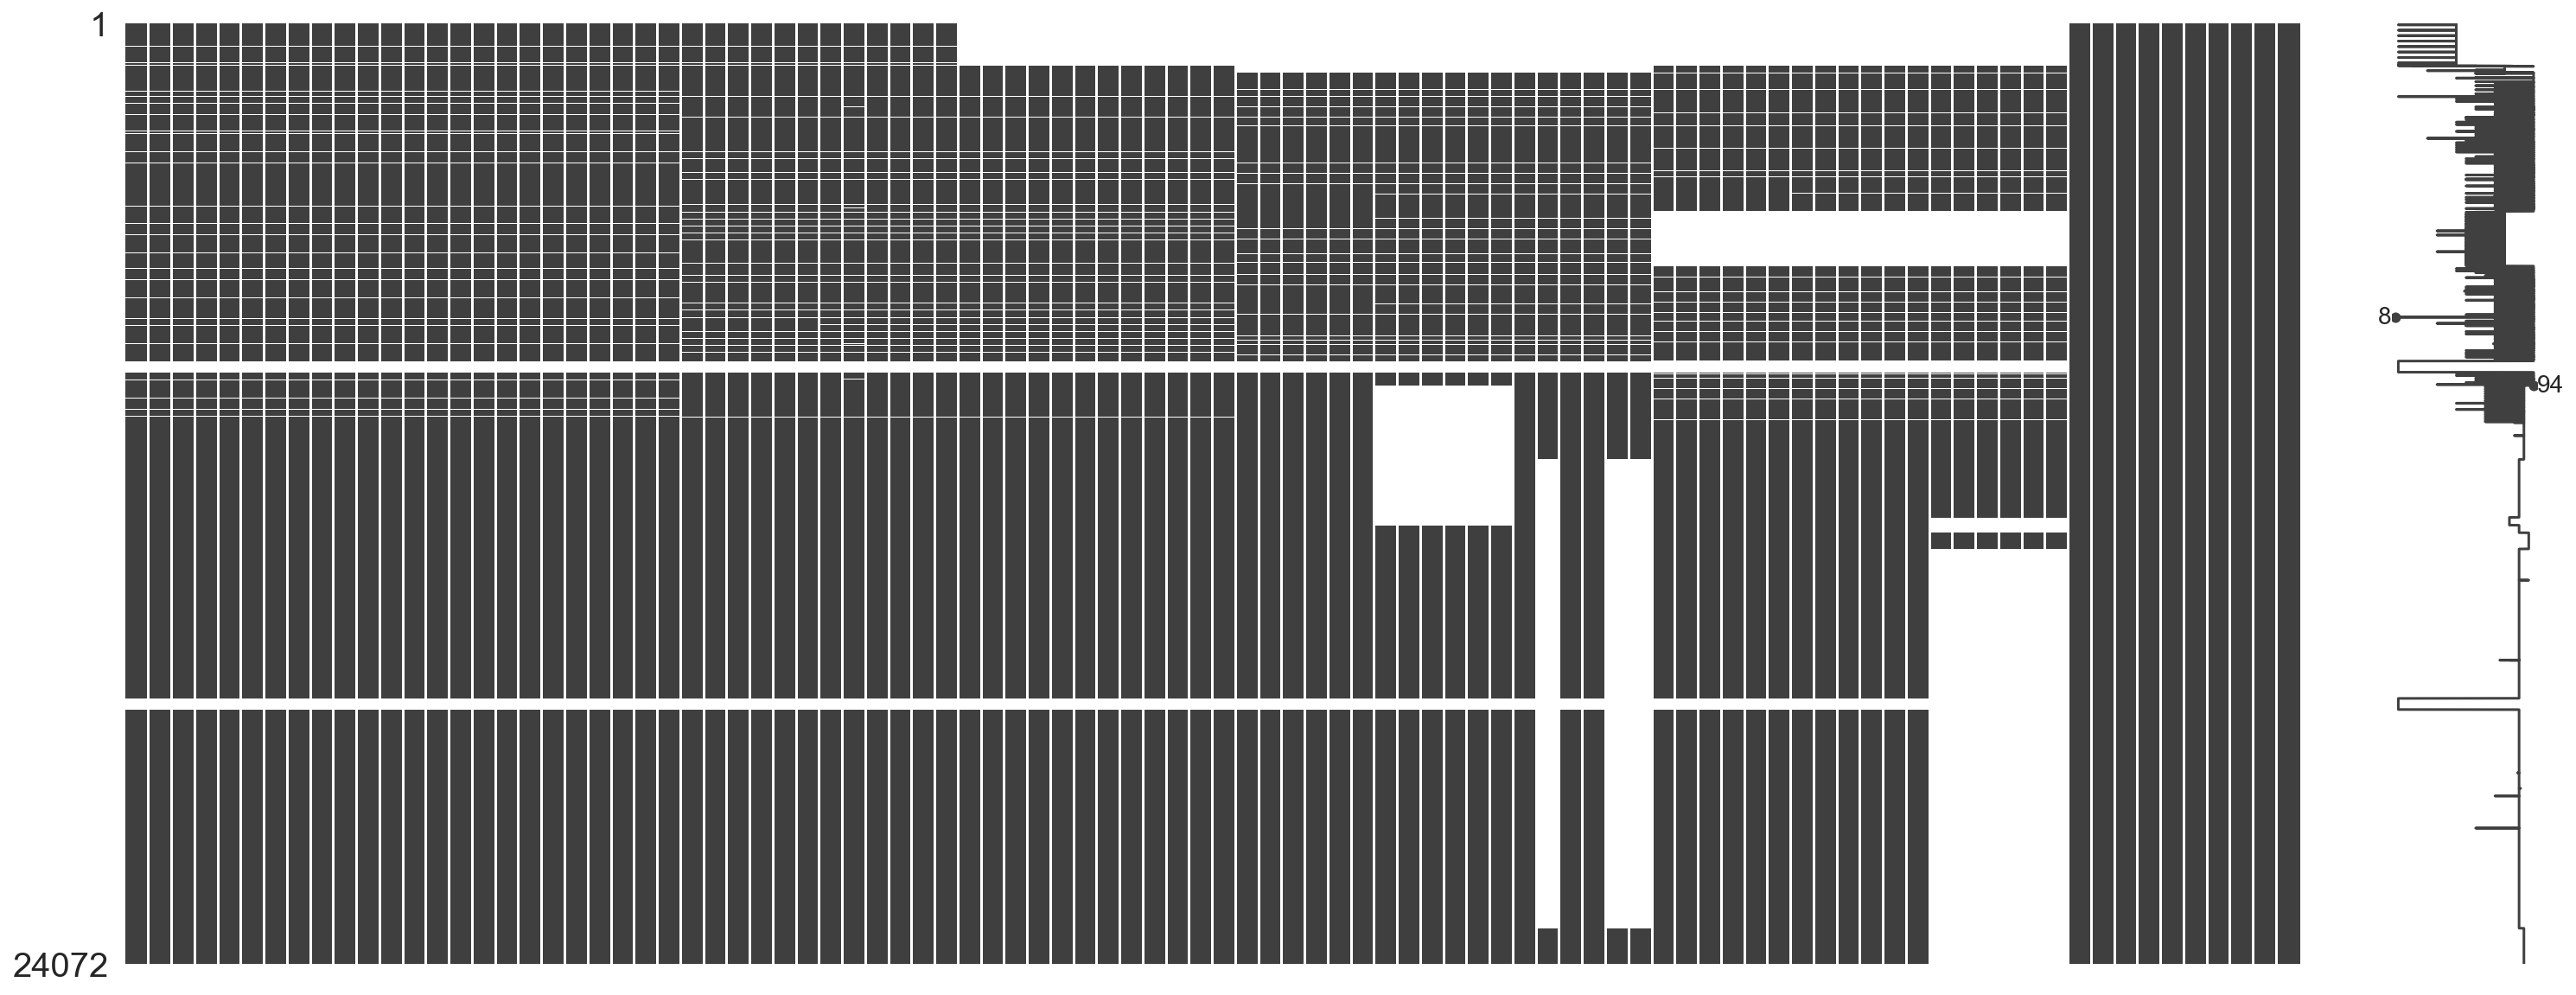

In [93]:
#!pip install missingno
import missingno as msno
msno.matrix(data)

<AxesSubplot:>

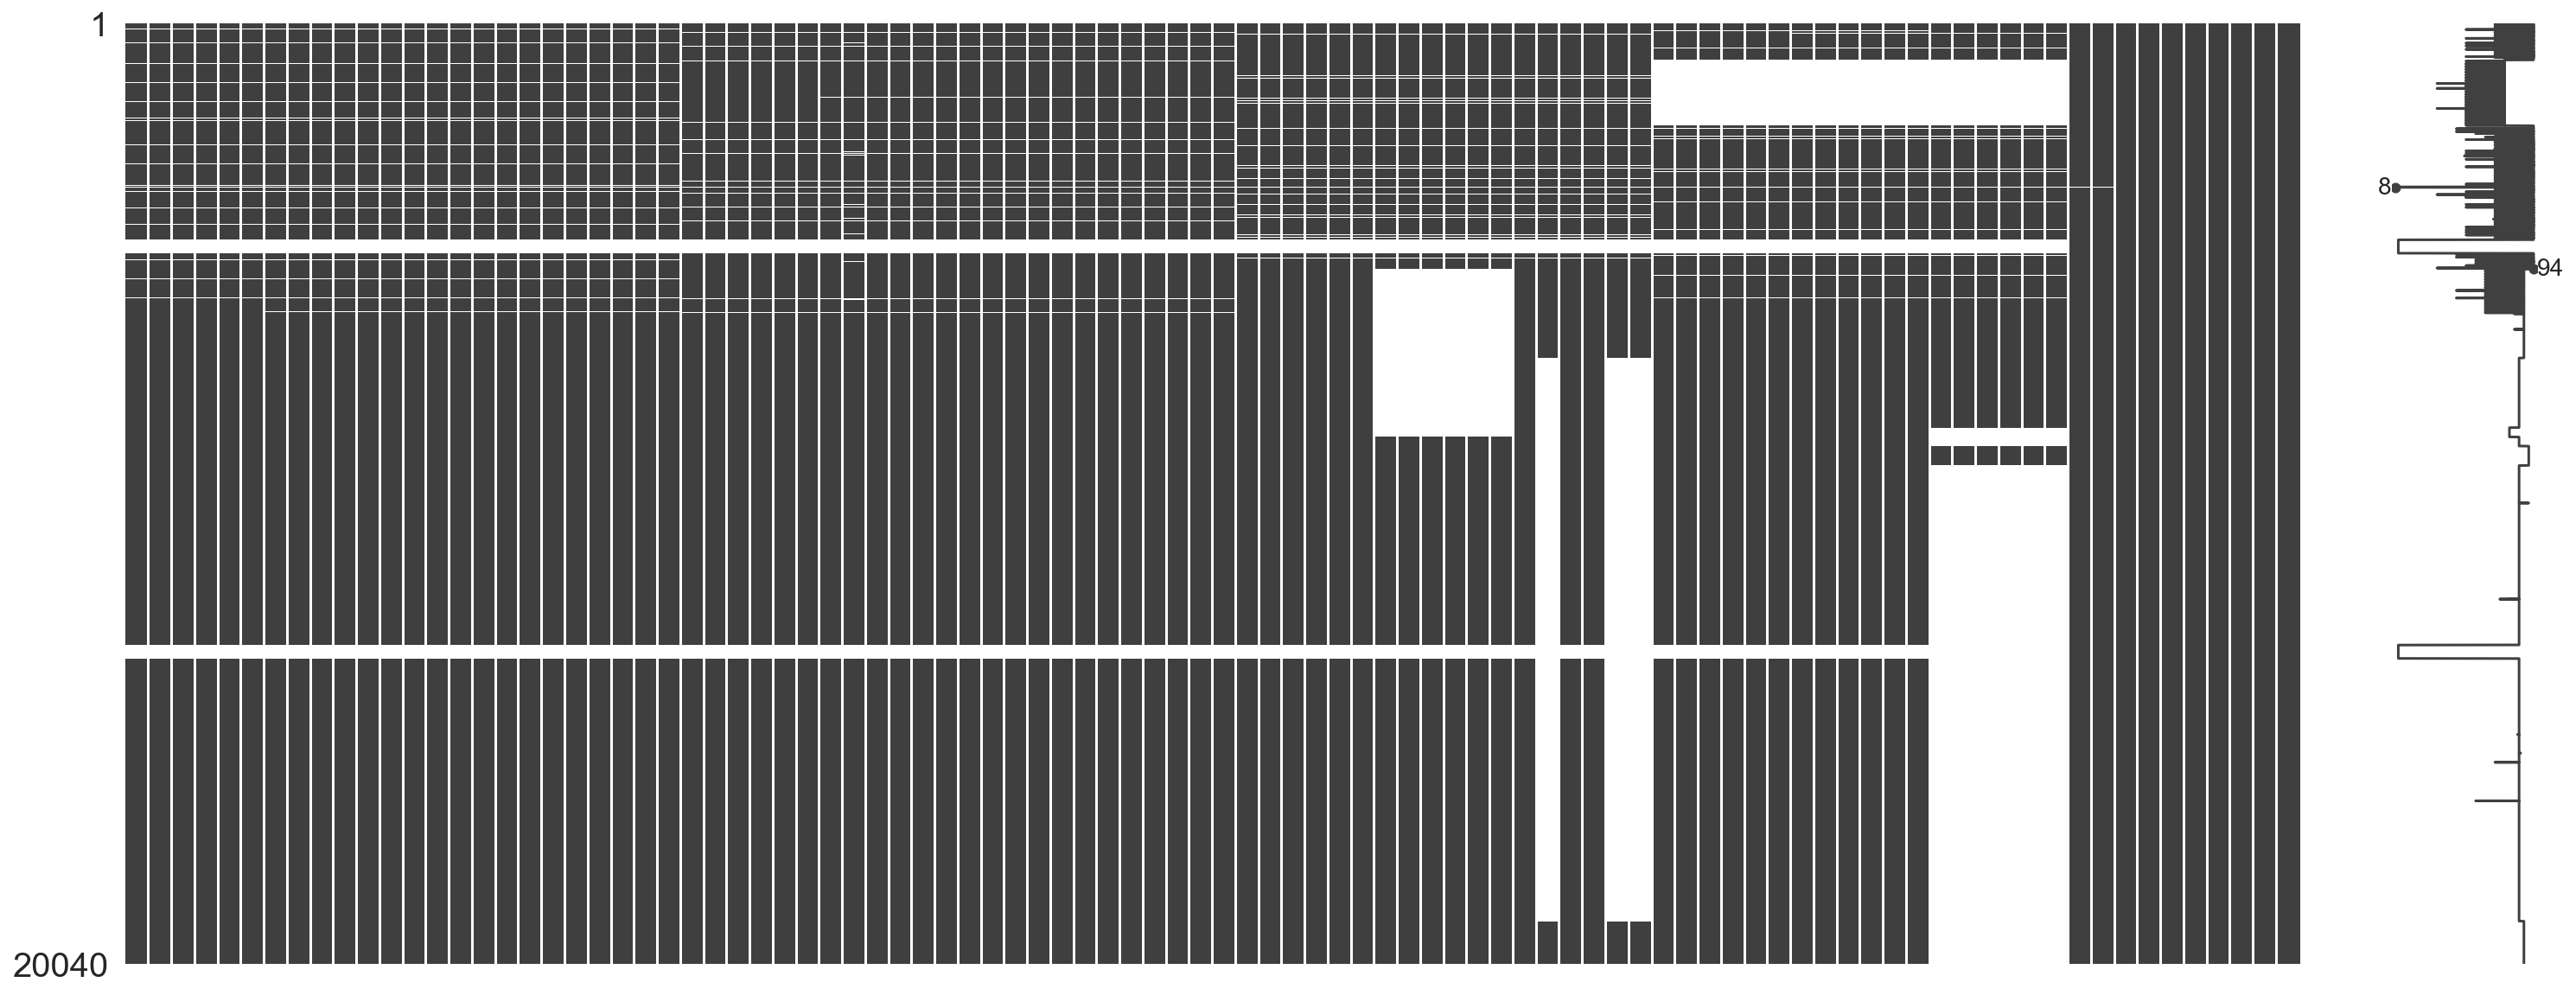

In [94]:
# delet colones where more then 7% of missing data
startDate, endDate ="2022-03-15","2022-05-23"
df = data[startDate:endDate].copy()
msno.matrix(df)

df.shape : (20040, 67)


<AxesSubplot:>

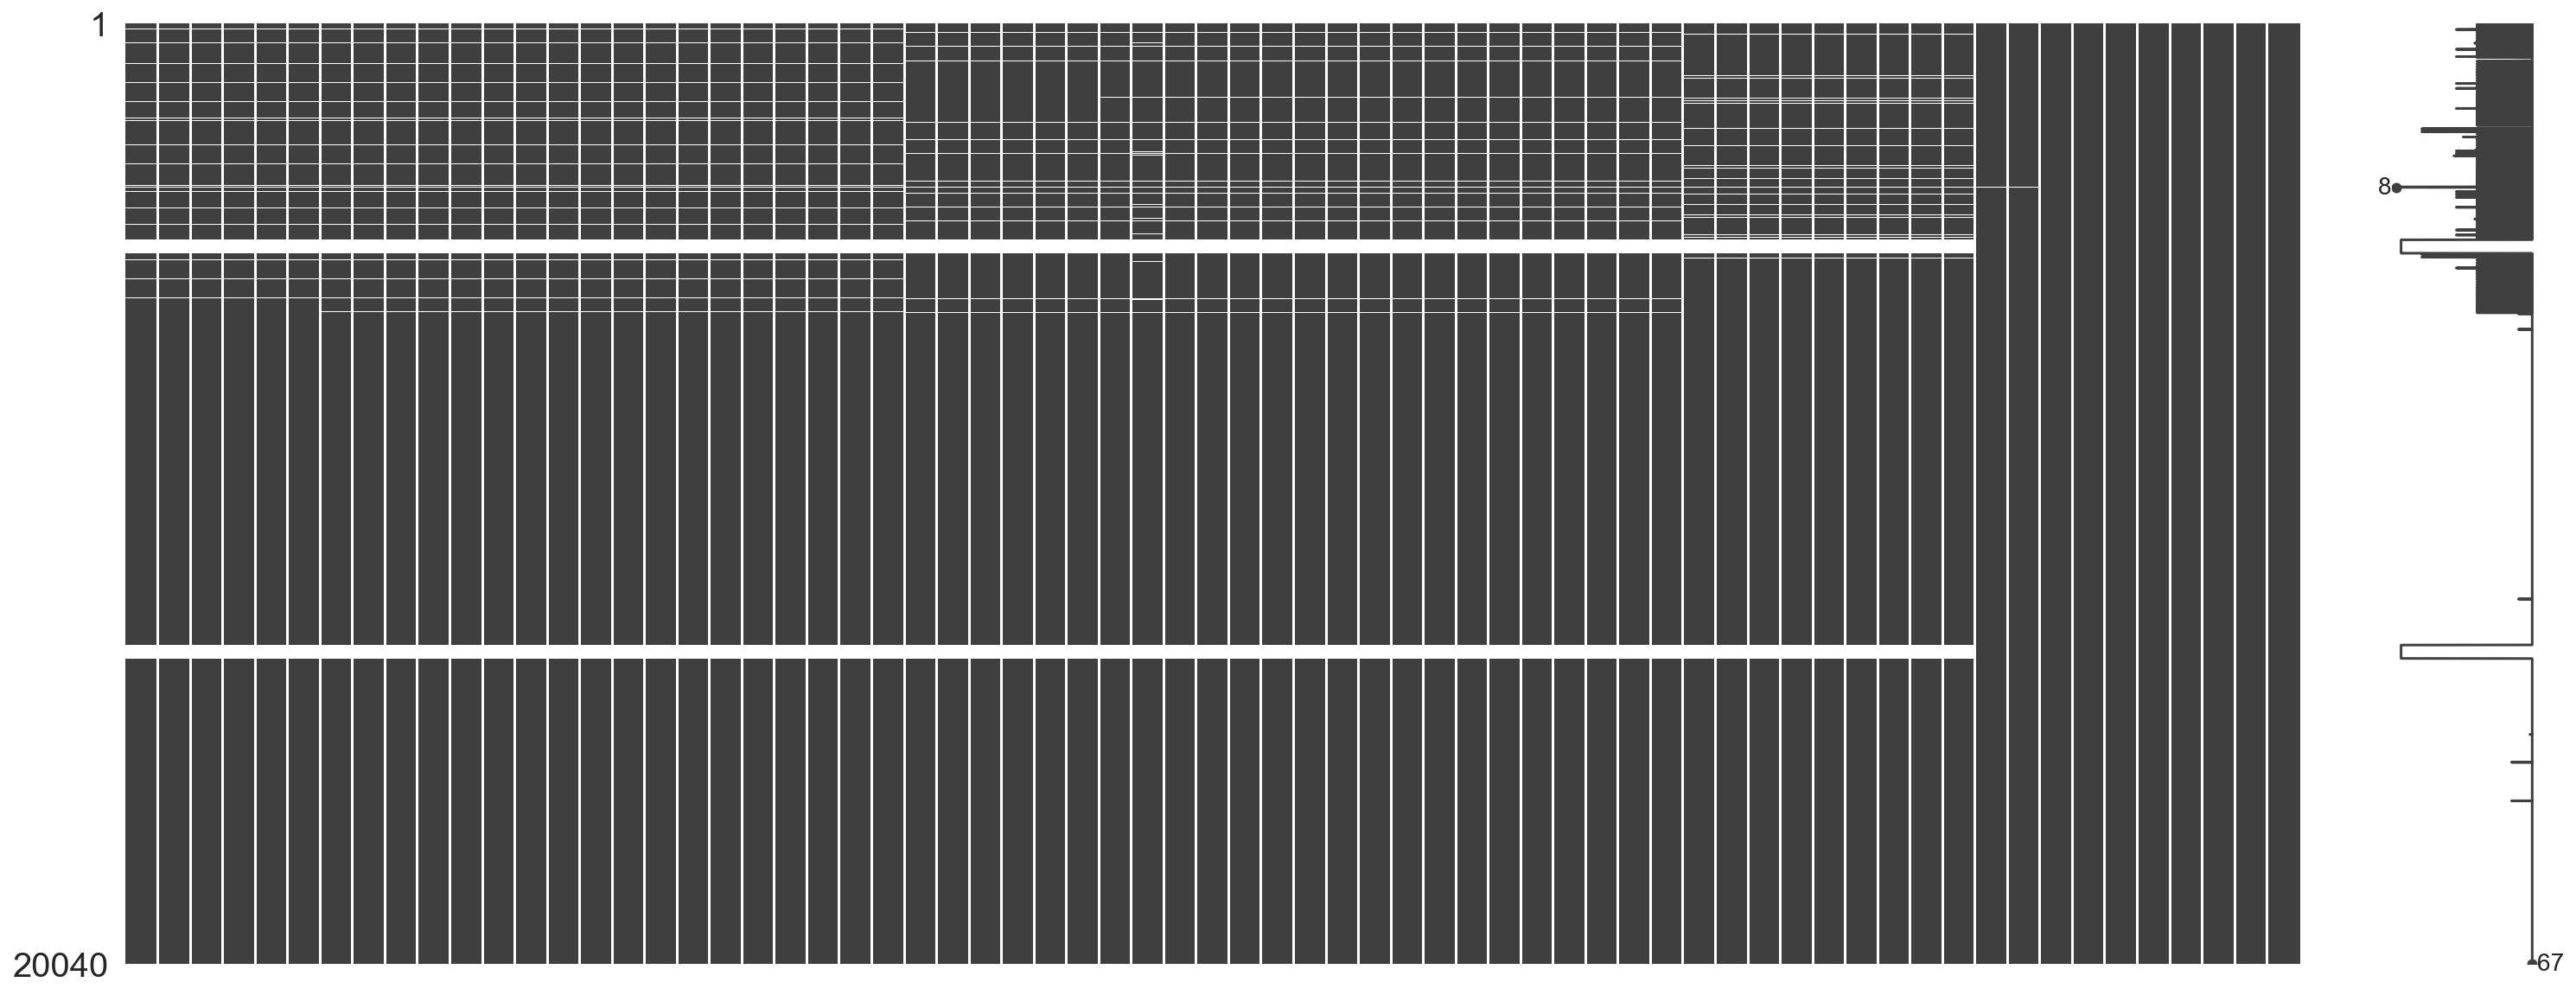

In [95]:
perc = 5 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = data[startDate:endDate].copy()
df = df.dropna( axis=1, 
                thresh=min_count)
print("df.shape :",df.shape)
msno.matrix(df)

In [96]:
df.interpolate(method='linear', inplace=True)
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)

In [97]:
#dfna.co2_100.plot()
df.index = pd.to_datetime(df.index)

In [98]:
x = {"close": 0, "open" : 1}
df = df.replace(x)
df

co2_100    tvoc_100  temperature_100  humidity_100  \
date                                                                         
2022-03-15 00:00:00  509.333333  363.666667        25.893333     25.473333   
2022-03-15 00:05:00  504.250000  356.500000        25.895000     25.487500   
2022-03-15 00:10:00  500.500000  357.500000        25.900000     25.520000   
2022-03-15 00:15:00  499.666667  354.333333        25.890000     25.553333   
2022-03-15 00:20:00  498.833333  351.166667        25.880000     25.586667   
...                         ...         ...              ...           ...   
2022-05-23 13:35:00  601.600000  613.400000        27.048000     41.526000   
2022-05-23 13:40:00  595.000000  586.750000        27.060000     41.722500   
2022-05-23 13:45:00  585.200000  613.800000        27.020000     41.656000   
2022-05-23 13:50:00  575.500000  605.750000        26.992500     41.500000   
2022-05-23 13:55:00  570.750000  613.250000        27.000000     41.287500   

                      light_100   sound_100     co2_101    tvoc_101  \
date                                                                  
2022-03-15 00:00:00  519.333333  509.666667  443.666667  212.000000   
2022-03-15 00:05:00  619.500000  509.750000  439.666667  205.666667   
2022-03-15 00:10:00  489.500000  510.000000  437.000000  207.333333   
2022-03-15 00:15:00  500.666667  510.000000  439.666667  211.888889   
2022-03-15 00:20:00  511.833333  510.000000  442.333333  216.444444   
...                         ...         ...         ...         ...   
2022-05-23 13:35:00  850.400000  509.800000  606.250000  676.000000   
2022-05-23 13:40:00  860.750000  509.500000  600.600000  686.800000   
2022-05-23 13:45:00  791.600000  509.600000  594.500000  696.750000   
2022-05-23 13:50:00  820.750000  509.750000  588.800000  696.200000   
2022-05-23 13:55:00  844.000000  509.500000  579.750000  711.250000   

                     temperature_101  humidity_101  ...  elec_general_219_w  \
date                                                ...                       
2022-03-15 00:00:00        25.450000     25.786667  ...             292.932   
2022-03-15 00:05:00        25.453333     25.813333  ...             302.632   
2022-03-15 00:10:00        25.460000     25.853333  ...             291.616   
2022-03-15 00:15:00        25.450000     25.882222  ...             303.436   
2022-03-15 00:20:00        25.440000     25.911111  ...             294.356   
...                              ...           ...  ...                 ...   
2022-05-23 13:35:00        27.045000     41.225000  ...             302.044   
2022-05-23 13:40:00        27.098000     41.210000  ...             300.706   
2022-05-23 13:45:00        27.130000     41.190000  ...             293.346   
2022-05-23 13:50:00        27.102000     41.196000  ...             303.260   
2022-05-23 13:55:00        27.055000     41.165000  ...             294.396   

                     elec_eclairage_219_w  weather_out  weather_hum  \
date                                                                  
2022-03-15 00:00:00                   0.0    11.600000    66.000000   
2022-03-15 00:05:00                   0.0    11.616667    66.333333   
2022-03-15 00:10:00                   0.0    11.633333    66.666667   
2022-03-15 00:15:00                   0.0    11.650000    67.000000   
2022-03-15 00:20:00                   0.0    11.666667    67.333333   
...                                   ...          ...          ...   
2022-05-23 13:35:00                   0.0    15.400000    88.000000   
2022-05-23 13:40:00                   0.0    15.700000    86.000000   
2022-05-23 13:45:00                   0.0    16.100000    86.000000   
2022-05-23 13:50:00                   0.0    15.900000    84.000000   
2022-05-23 13:55:00                   0.0    15.800000    86.000000   

                     weather_bar_  weather_rad_  state_AA7BF5  state_AA4706  \
date                                                  

In [99]:
df["windows"] = df["state_AA7BF5"] +  df["state_AA4706"] + df["state_AA9130"] +  df["state_483FDA81E0F4"] 
df

co2_100    tvoc_100  temperature_100  humidity_100  \
date                                                                         
2022-03-15 00:00:00  509.333333  363.666667        25.893333     25.473333   
2022-03-15 00:05:00  504.250000  356.500000        25.895000     25.487500   
2022-03-15 00:10:00  500.500000  357.500000        25.900000     25.520000   
2022-03-15 00:15:00  499.666667  354.333333        25.890000     25.553333   
2022-03-15 00:20:00  498.833333  351.166667        25.880000     25.586667   
...                         ...         ...              ...           ...   
2022-05-23 13:35:00  601.600000  613.400000        27.048000     41.526000   
2022-05-23 13:40:00  595.000000  586.750000        27.060000     41.722500   
2022-05-23 13:45:00  585.200000  613.800000        27.020000     41.656000   
2022-05-23 13:50:00  575.500000  605.750000        26.992500     41.500000   
2022-05-23 13:55:00  570.750000  613.250000        27.000000     41.287500   

                      light_100   sound_100     co2_101    tvoc_101  \
date                                                                  
2022-03-15 00:00:00  519.333333  509.666667  443.666667  212.000000   
2022-03-15 00:05:00  619.500000  509.750000  439.666667  205.666667   
2022-03-15 00:10:00  489.500000  510.000000  437.000000  207.333333   
2022-03-15 00:15:00  500.666667  510.000000  439.666667  211.888889   
2022-03-15 00:20:00  511.833333  510.000000  442.333333  216.444444   
...                         ...         ...         ...         ...   
2022-05-23 13:35:00  850.400000  509.800000  606.250000  676.000000   
2022-05-23 13:40:00  860.750000  509.500000  600.600000  686.800000   
2022-05-23 13:45:00  791.600000  509.600000  594.500000  696.750000   
2022-05-23 13:50:00  820.750000  509.750000  588.800000  696.200000   
2022-05-23 13:55:00  844.000000  509.500000  579.750000  711.250000   

                     temperature_101  humidity_101  ...  elec_eclairage_219_w  \
date                                                ...                         
2022-03-15 00:00:00        25.450000     25.786667  ...                   0.0   
2022-03-15 00:05:00        25.453333     25.813333  ...                   0.0   
2022-03-15 00:10:00        25.460000     25.853333  ...                   0.0   
2022-03-15 00:15:00        25.450000     25.882222  ...                   0.0   
2022-03-15 00:20:00        25.440000     25.911111  ...                   0.0   
...                              ...           ...  ...                   ...   
2022-05-23 13:35:00        27.045000     41.225000  ...                   0.0   
2022-05-23 13:40:00        27.098000     41.210000  ...                   0.0   
2022-05-23 13:45:00        27.130000     41.190000  ...                   0.0   
2022-05-23 13:50:00        27.102000     41.196000  ...                   0.0   
2022-05-23 13:55:00        27.055000     41.165000  ...                   0.0   

                     weather_out  weather_hum  weather_bar_  weather_rad_  \
date                                                                        
2022-03-15 00:00:00    11.600000    66.000000       1023.10           0.0   
2022-03-15 00:05:00    11.616667    66.333333       1023.05           0.0   
2022-03-15 00:10:00    11.633333    66.666667       1023.00           0.0   
2022-03-15 00:15:00    11.650000    67.000000       1022.95           0.0   
2022-03-15 00:20:00    11.666667    67.333333       1022.90           0.0   
...                          ...          ...           ...           ...   
2022-05-23 13:35:00    15.400000    88.000000       1006.00         956.0   
2022-05-23 13:40:00    15.700000    86.000000       1006.20         499.0   
2022-05-23 13:45:00    16.100000    86.000000       1006.30         364.0   
2022-05-23 13:50:00    15.900000    84.000000       1006.40         184.0   
2022-05-23 13:55:00    15.800000    86.000000       1006.40         284.0   

                     state_AA

In [100]:
df.windows.max()

4

In [101]:
#df.to_csv("../HandlingMissingData/df_219complet25mai.csv")

In [102]:
corr = df.corr()
corr.tail(40)

co2_100  tvoc_100  temperature_100  humidity_100  \
light_104             0.386328  0.160823         0.315966      0.052067   
sound_104             0.050413  0.048606         0.040034      0.011705   
co2_105               0.775052  0.292394         0.330664     -0.053166   
tvoc_105              0.457843  0.621893         0.289349      0.156662   
temperature_105       0.505465  0.382921         0.915386      0.207999   
humidity_105          0.066922  0.168366         0.265751      0.987172   
light_105             0.403319  0.162849         0.321286      0.059883   
sound_105             0.012356  0.033177         0.003458      0.002817   
co2_106               0.983181  0.554167         0.460427      0.143052   
tvoc_106              0.627737  0.873857         0.410120      0.126107   
temperature_106       0.447181  0.367857         0.921802      0.238454   
humidity_106          0.104082  0.189570         0.291809      0.986799   
light_106             0.471776  0.209572         0.350301      0.061357   
sound_106            -0.042002 -0.022277        -0.029707     -0.021332   
co2_107               0.983012  0.534286         0.448693      0.087411   
tvoc_107              0.632575  0.912685         0.401497      0.152862   
temperature_107       0.395436  0.352310         0.921810      0.260151   
humidity_107          0.123136  0.194221         0.297790      0.985827   
light_107             0.407417  0.164995         0.318372      0.053520   
sound_107             0.005173  0.000857         0.003030      0.006247   
co2_108               0.978579  0.553433         0.419945     -0.004064   
tvoc_108              0.635624  0.901932         0.396203      0.180232   
temperature_108       0.380121  0.356974         0.917030      0.280005   
humidity_108          0.119511  0.188665         0.296357      0.984736   
light_108             0.377724  0.156321         0.302362      0.049325   
sound_108             0.118672  0.111381         0.184607     -0.134401   
co2_110               0.566749  0.289229         0.301388     -0.270296   
temperature_110       0.196882  0.094052         0.165260     -0.436019   
humidity_110          0.217457  0.118131         0.209010     -0.234249   
elec_general_219_w    0.695546  0.399663         0.386431      0.015090   
elec_eclairage_219_w  0.576402  0.373788         0.363486      0.062743   
weather_out          -0.048773  0.021092         0.420982      0.387906   
weather_hum           0.026597  0.119725        -0.117672      0.428467   
weather_bar_          0.003063 -0.163906        -0.034718     -0.329519   
weather_rad_          0.189821  0.028345         0.199970      0.031866   
state_AA7BF5          0.133747  0.033940         0.050848     -0.003017   
state_AA4706          0.037335 -0.107097        -0.097120     -0.010659   
state_AA9130          0.118773  0.028870         0.005847     -0.027911   
state_483FDA81E0F4   -0.043817 -0.145801        -0.280615      0.112011   
windows               0.036473 -0.127934        -0.200626      0.051837   

                      light_100  sound_100   co2_101  tvoc_101  \
light_104              0.724986   0.218182  0.405462  0.170260   
sound_104              0.016617   0.009072  0.047469  0.051631   
co2_105                0.090541   0.040470  0.748238  0.272499   
tvoc_105              -0.009077  -0.019159  0.451128  0.618094   
temperature_105        0.051549   0.006048  0.525032  0.389249   
humidity_105          -0.126638  -0.092193  0.167364  0.212343   
light_105              0.736424   0.222605  0.425077  0.173413   
sound_105              0.003503  -0.032482  0.015166  0.023844   
co2_106                0.240374   0.060664  0.982243  0.566114   
tvoc_106               0.094002   0.008555  0.606451  0.873148   
temperature_106        0.023651  -0.007460  0.470109  0.373526   
humidity_106          -0.114457  -0.087135  0.203069  0.234541   
light_106              0.705709   0.212145  0.489126  0.220753   
sound_106             -

In [103]:
s=corr["elec_eclairage_219_w"]
s.sort_values(ascending=False)
# var = ["co2_104","co2_107","temperature_106","windows"]
# var = ["co2_107","temperature_106"]

elec_eclairage_219_w    1.000000
elec_general_219_w      0.876434
co2_102                 0.610165
co2_103                 0.595096
co2_108                 0.590466
                          ...   
weather_out            -0.025182
windows                -0.030919
weather_bar_           -0.050021
sound_106              -0.061266
state_483FDA81E0F4     -0.166461
Name: elec_eclairage_219_w, Length: 68, dtype: float64

In [108]:
## features
features = df.columns
features =features.drop([ 'state_AA7BF5', 'state_AA4706', 'state_AA9130',"state_483FDA81E0F4",
        'elec_general_219_w',
       'elec_eclairage_219_w'])

In [109]:
X=df[features]
df["elecWithoutEclairage"]= df[ 'elec_general_219_w'] - df['elec_eclairage_219_w']
y=df["elecWithoutEclairage"]

In [106]:
# save features and target in csv files
# X.to_csv("../HandlingMissingData/X_219_31mai.csv")
# y.to_csv("../HandlingMissingData/y_219_31mai.csv")

<AxesSubplot:ylabel='Frequency'>

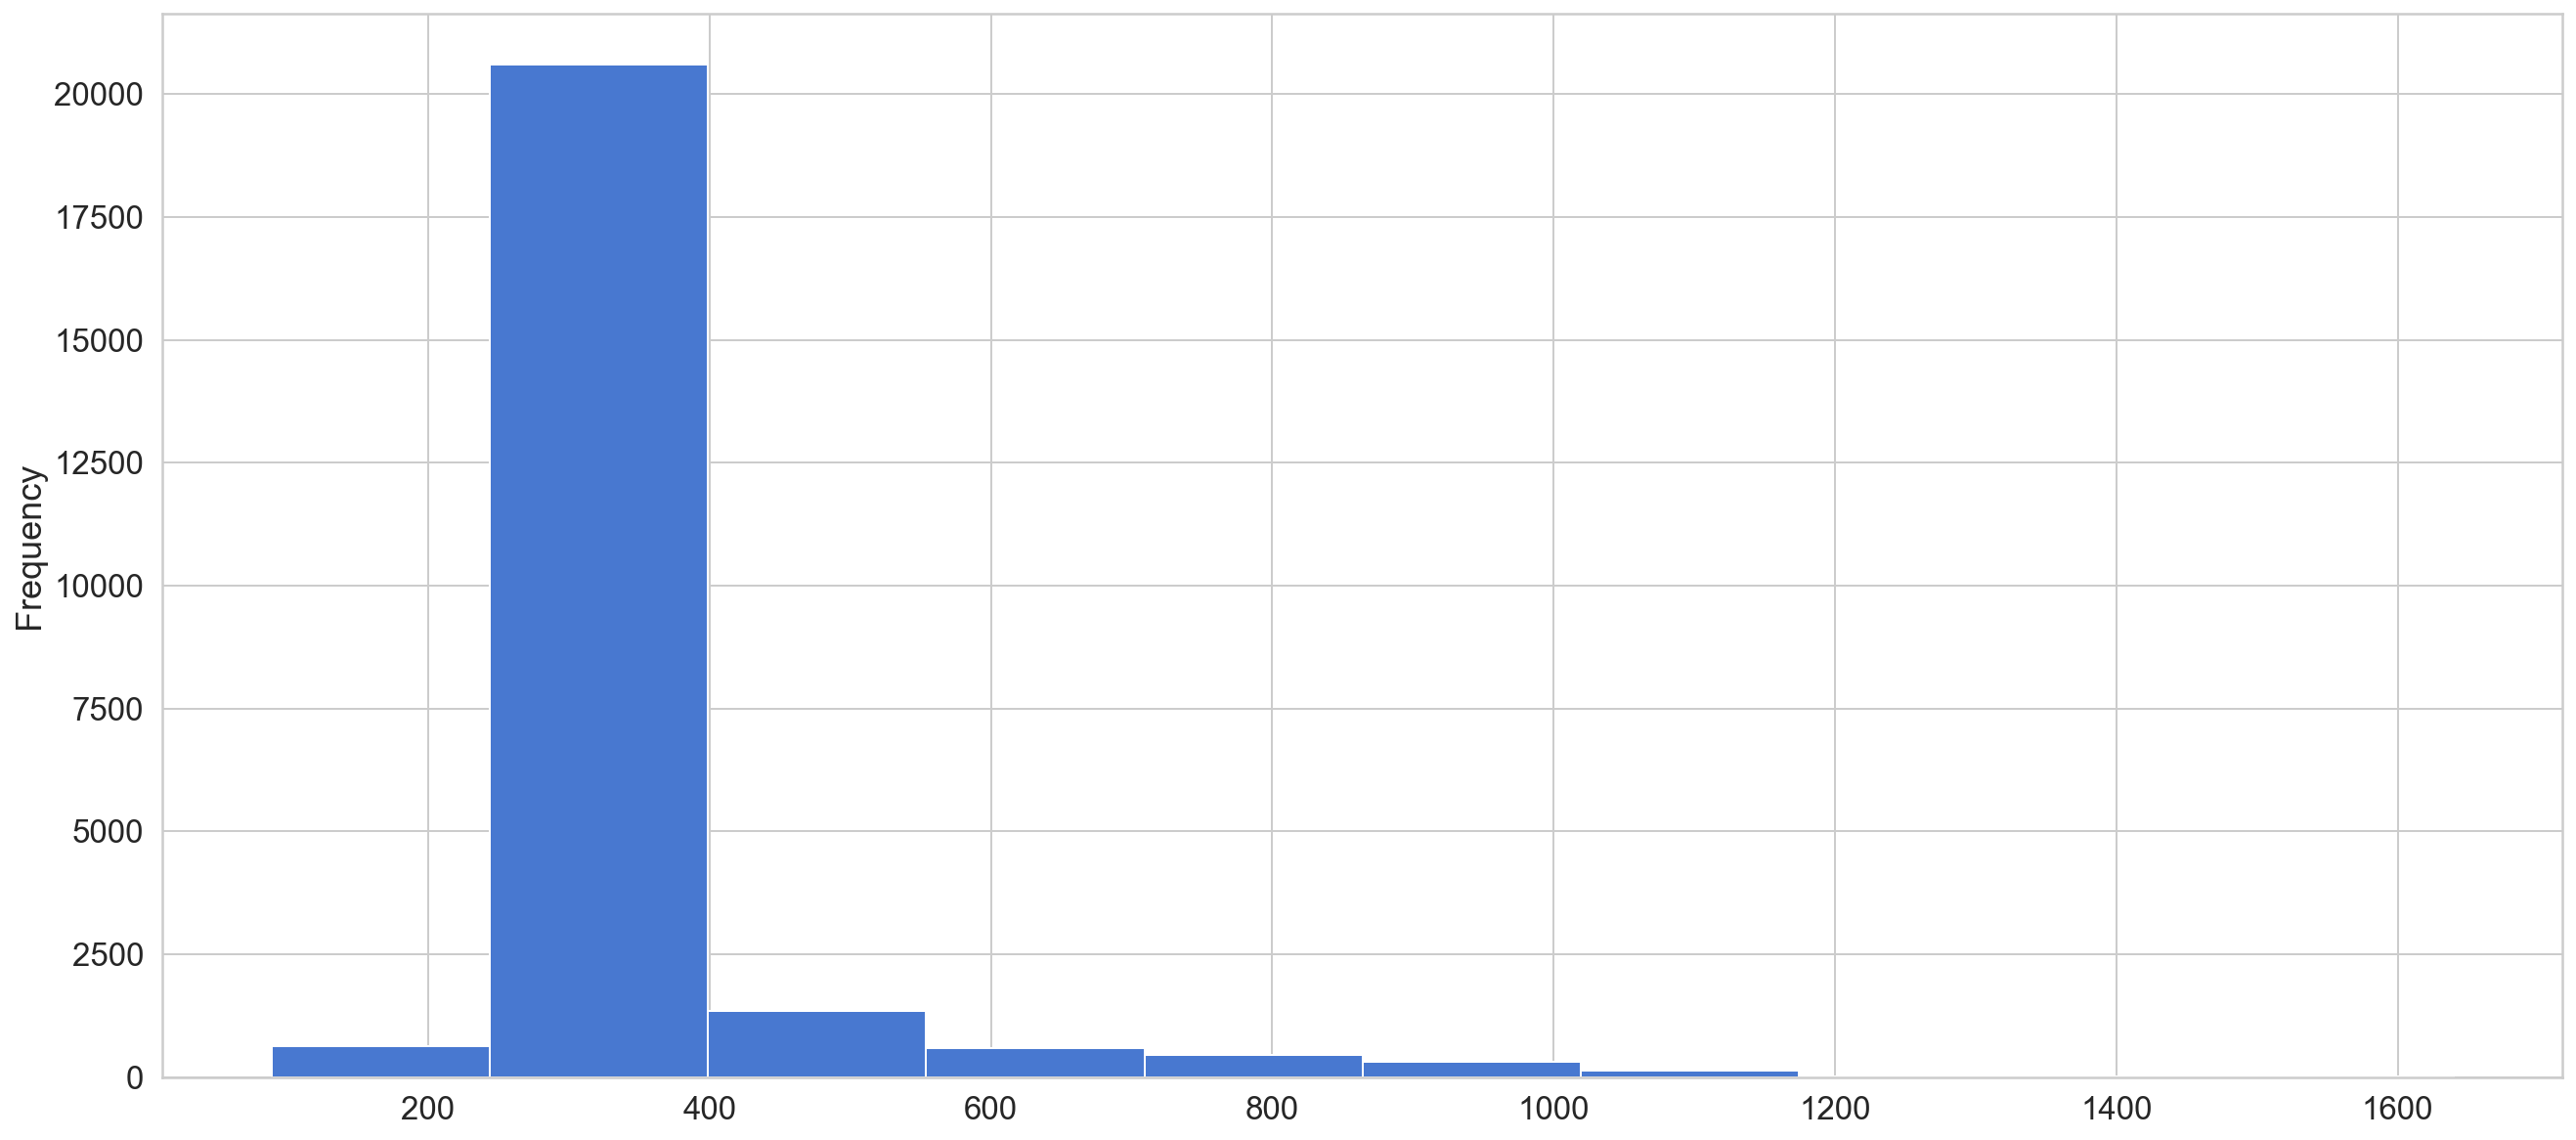

In [43]:
df["elecWithoutEclairage"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

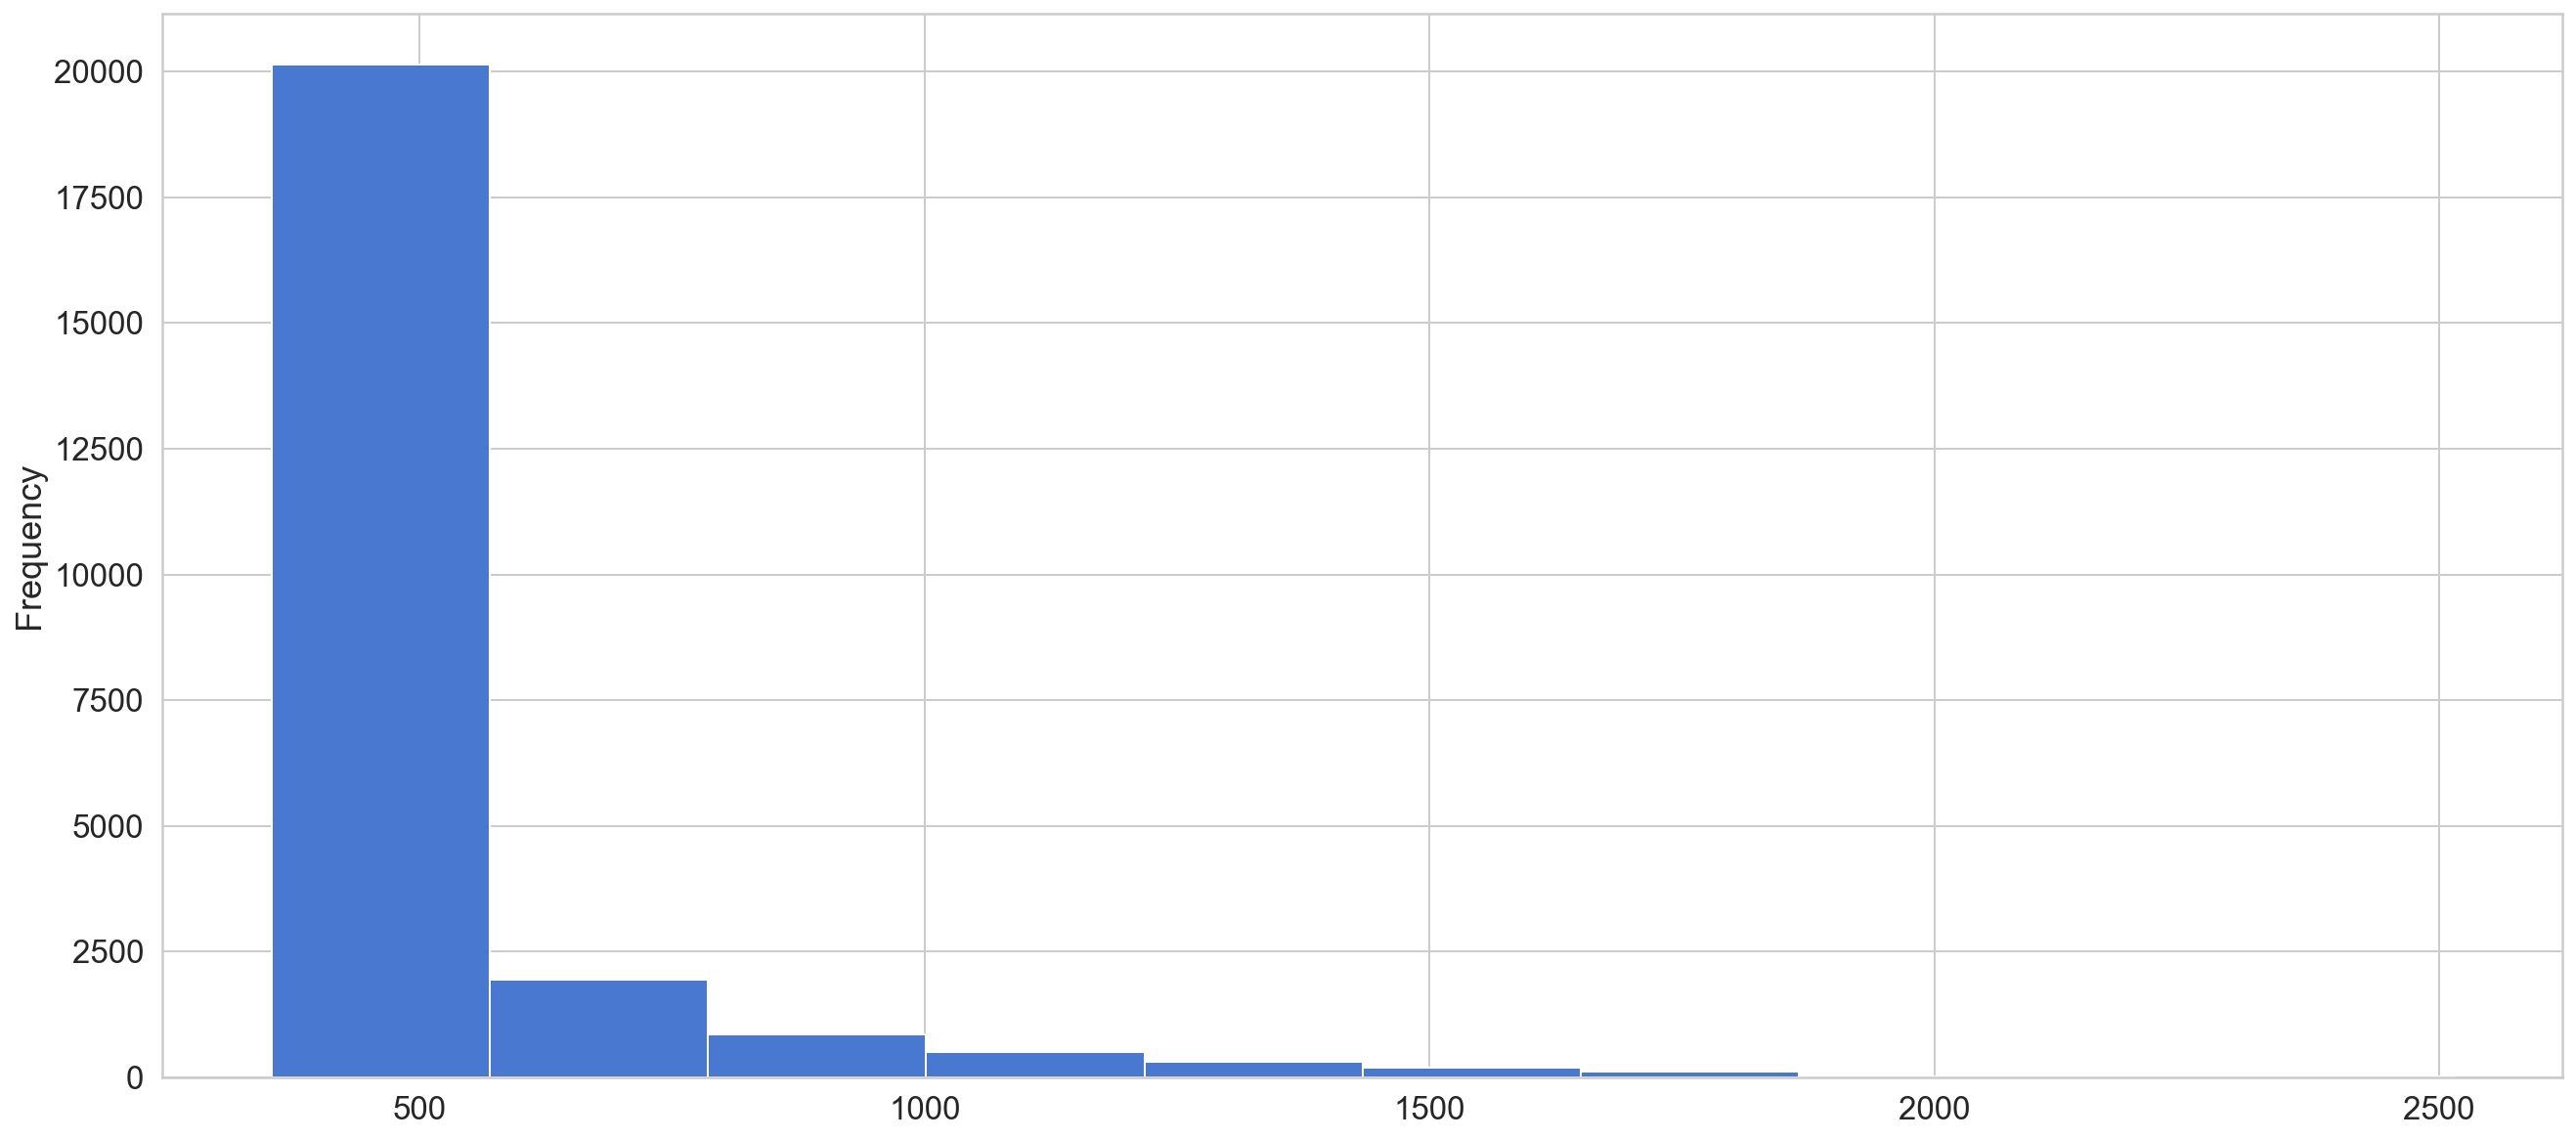

In [ ]:
df["co2_100"].plot(kind='hist')

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_

In [9]:
import pandas as pd
p=0.01
y=pd.read_csv("y_219_25mai.csv", parse_dates=["date"], index_col="date")
X=pd.read_csv("X_219_25mai.csv", parse_dates=["date"], index_col="date")
# y = y.values.ravel()
# X_train = X[:int(X.shape[0]*p)]
# X_test = X[int(X.shape[0]*p):]
# y_train = y[:int(X.shape[0]*p)]
# y_test = y[int(X.shape[0]*p):]

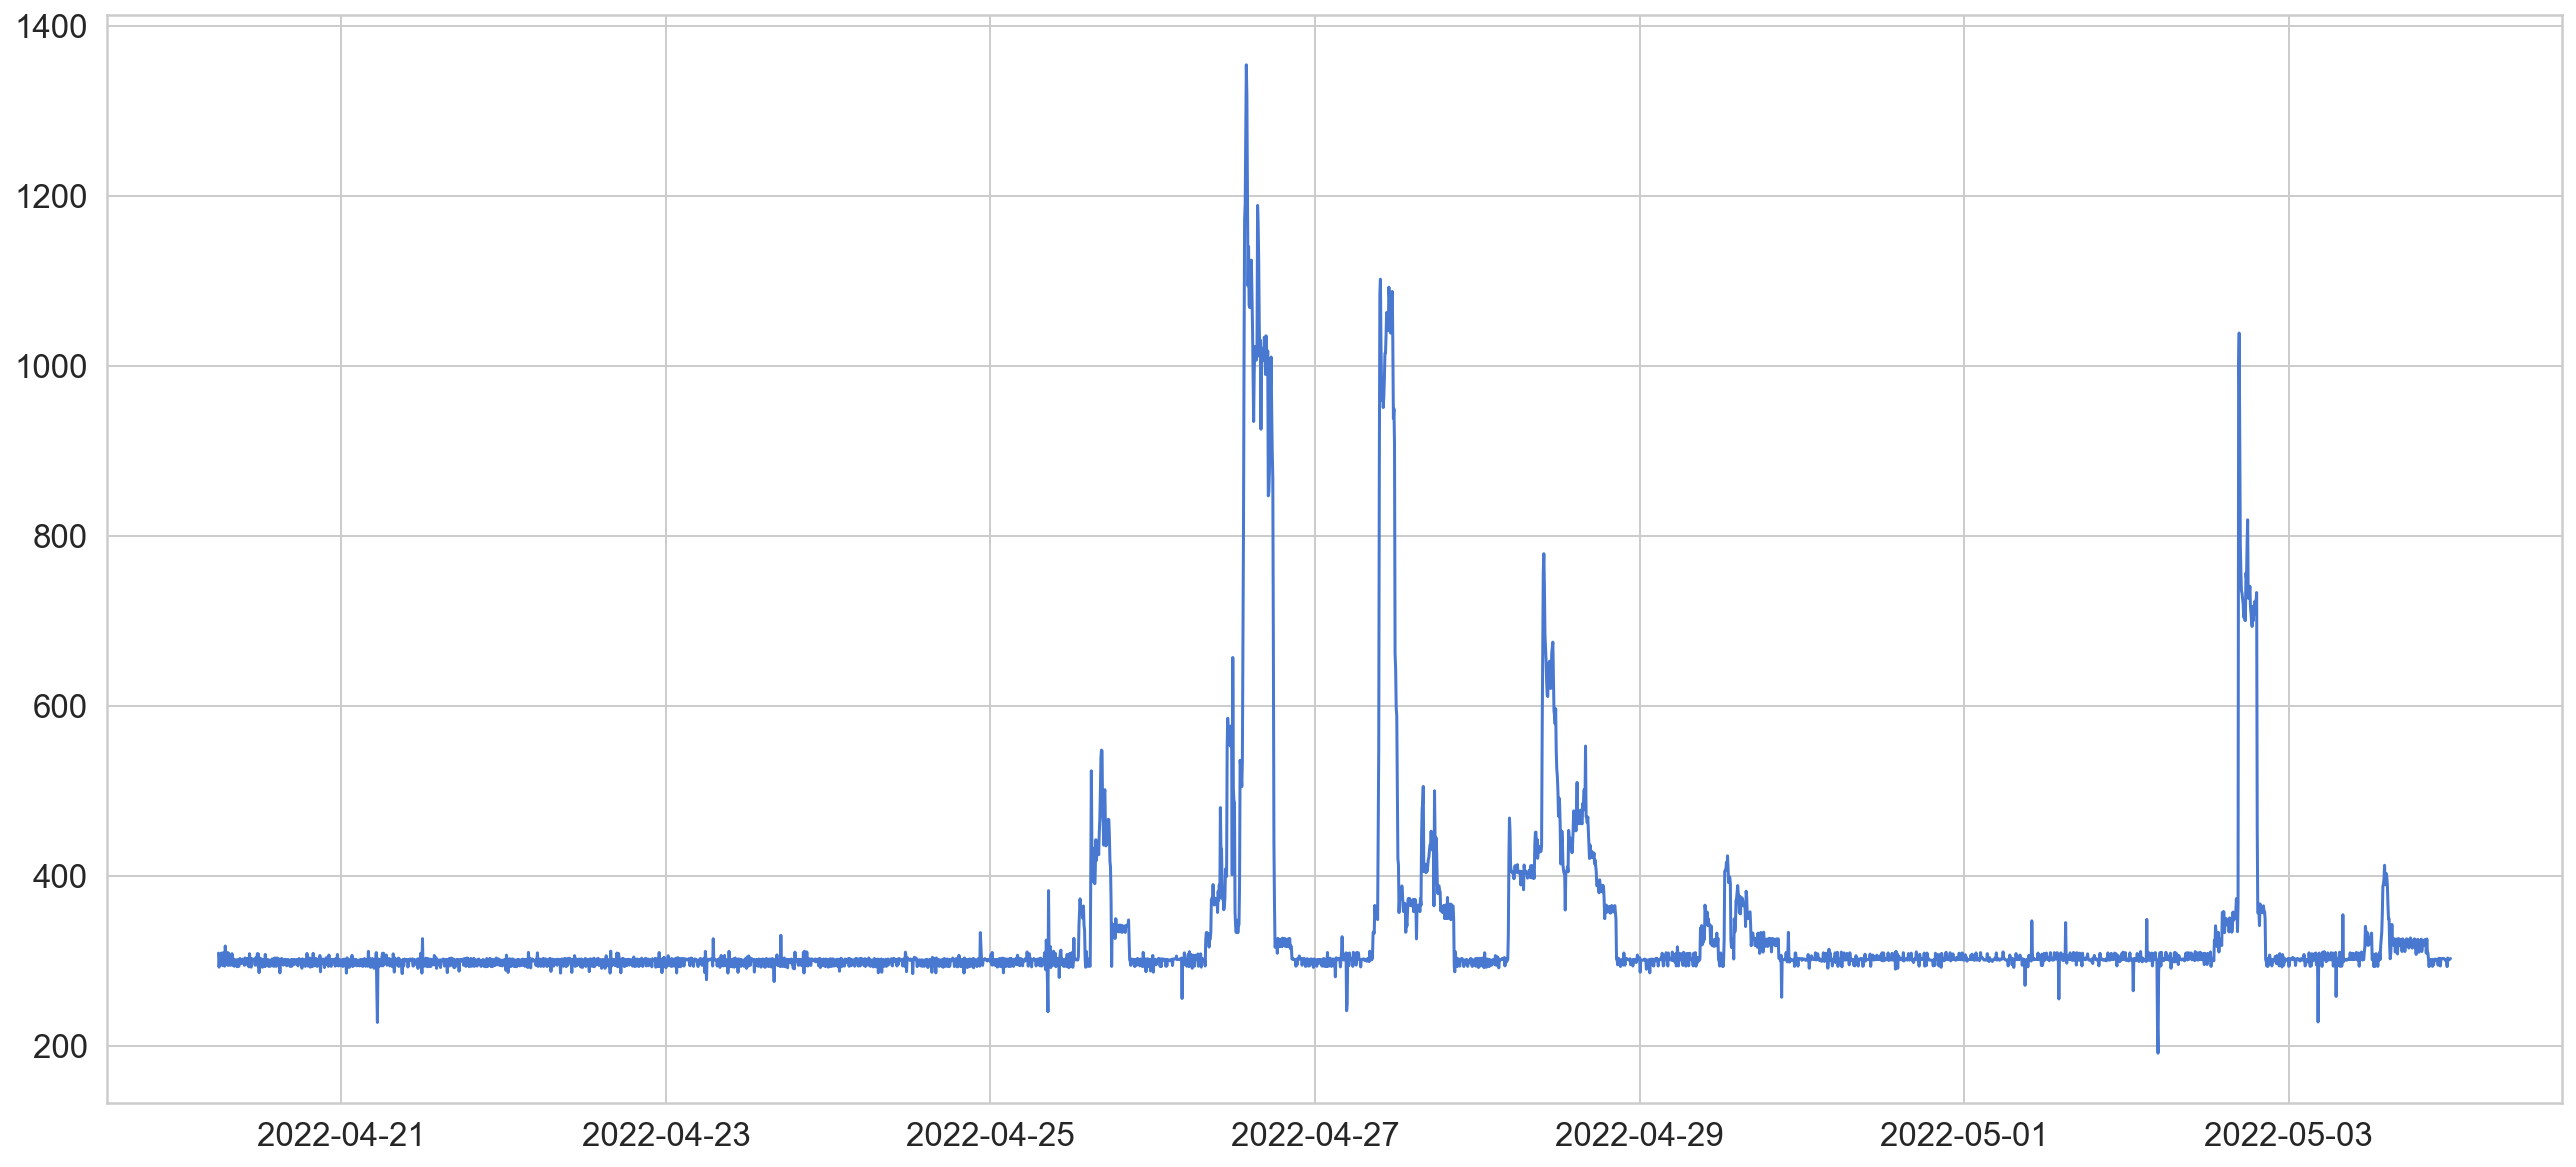

In [16]:
plt.plot(ytest)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 

In [17]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.35, shuffle=False)

In [18]:
rfr = RandomForestRegressor()
print(rfr)
 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

RandomForestRegressor()


RandomForestRegressor()

In [19]:
rfr.fit(xtrain, ytrain)
score = rfr.score(xtrain, ytrain)
print("R-squared:", score) 

C:\Users\ahmed\AppData\Local\Temp/ipykernel_1848/2384952167.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain, ytrain)


R-squared: 0.9881786383364761


In [20]:
ypred = rfr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
rmse = mean_squared_error(ytest, ypred,squared=False)
print("MSE: ", mse)
print("RMSE: ", rmse) 

MSE:  11769.891559736745
RMSE:  108.48913106729515


In [103]:
rfr.feature_importances_

array([0.00396511, 0.00292037, 0.2437617 , 0.00644991, 0.00171399,
       0.00138962, 0.01296423, 0.01157755, 0.21044606, 0.00455259,
       0.00159767, 0.02771268, 0.01486434, 0.00192328, 0.00179764,
       0.00350975, 0.00230302, 0.00088945, 0.01259763, 0.01898643,
       0.002758  , 0.00588443, 0.00510948, 0.00241078, 0.00266908,
       0.00346674, 0.00935341, 0.0021119 , 0.00287266, 0.00193081,
       0.00570842, 0.00375216, 0.00375077, 0.00221471, 0.00226449,
       0.00098673, 0.02216386, 0.00829667, 0.0026743 , 0.00217125,
       0.00588068, 0.00127967, 0.00483595, 0.00415634, 0.00323012,
       0.00315109, 0.00492949, 0.00110968, 0.00453282, 0.00290441,
       0.00380869, 0.00378831, 0.00194914, 0.02810704, 0.01399885,
       0.00672953, 0.00583832, 0.00341205, 0.01131717, 0.0241846 ,
       0.00238998, 0.00497077, 0.00140263, 0.00477516, 0.00764853,
       0.00392657, 0.00321067, 0.00537943, 0.00126854, 0.02993522,
       0.01033223, 0.08070379, 0.00752589, 0.01891297])

In [108]:
from sklearn.feature_selection import SelectFromModel
# rfr = clf.fit(xtrain, ytrain)
# clf.feature_importances_  
# array([ 0.04...,  0.05...,  0.4...,  0.4...])
model = SelectFromModel(rfr, prefit=True)
X_new = model.transform(xtrain)
X_new    


array([[2.42775000e+01, 2.18625000e+01, 5.37250000e+02, ...,
        2.12000000e+01, 1.02390000e+03, 3.00000000e+00],
       [2.44866667e+01, 2.22566667e+01, 5.53000000e+02, ...,
        2.11666667e+01, 1.02390000e+03, 0.00000000e+00],
       [2.33966667e+01, 2.32666667e+01, 5.04666667e+02, ...,
        2.11333333e+01, 1.02390000e+03, 0.00000000e+00],
       ...,
       [2.47220000e+01, 2.44060000e+01, 2.01400000e+02, ...,
        7.80000000e+00, 1.01680000e+03, 1.00000000e+00],
       [2.47075000e+01, 2.44175000e+01, 1.98000000e+02, ...,
        7.70000000e+00, 1.01680000e+03, 1.00000000e+00],
       [2.46980000e+01, 2.44225000e+01, 2.02000000e+02, ...,
        7.60000000e+00, 1.01670000e+03, 1.00000000e+00]])

In [106]:
xtrain.loc[:,model.get_support()]

temperature_100  temperature_101   sound_101     co2_102  \
date                                                                            
2022-03-25 16:45:00        24.277500        21.862500  537.250000  421.500000   
2022-03-25 16:50:00        24.486667        22.256667  553.000000  366.000000   
2022-03-25 16:55:00        23.396667        23.266667  504.666667  415.333333   
2022-03-25 17:00:00        25.515000        25.135000  471.750000  413.250000   
2022-03-25 17:05:00        26.533333        26.130000  509.666667  411.666667   
...                              ...              ...         ...         ...   
2022-04-26 02:55:00        24.725000        24.390000  182.750000  431.250000   
2022-04-26 03:00:00        24.712500        24.395000  217.250000  427.500000   
2022-04-26 03:05:00        24.722000        24.406000  201.400000  429.000000   
2022-04-26 03:10:00        24.707500        24.417500  198.000000  425.400000   
2022-04-26 03:15:00        24.698000        24.422500  202.000000  423.500000   

                       tvoc_103     co2_106  sound_108     co2_110  \
date                                                                 
2022-03-25 16:45:00   27.666667  388.750000       11.0  338.500000   
2022-03-25 16:50:00   50.500000  394.666667       11.0  340.230769   
2022-03-25 16:55:00  123.666667  400.333333       11.0  341.961538   
2022-03-25 17:00:00  171.666667  403.250000       11.0  343.692308   
2022-03-25 17:05:00  201.250000  406.666667       11.0  345.423077   
...                         ...         ...        ...         ...   
2022-04-26 02:55:00  306.500000  443.000000        3.0    0.000000   
2022-04-26 03:00:00  295.250000  445.500000        3.2    0.000000   
2022-04-26 03:05:00  302.750000  445.000000        3.0    0.000000   
2022-04-26 03:10:00  300.200000  445.400000        3.0    0.000000   
2022-04-26 03:15:00  308.250000  444.500000        3.0    0.000000   

                     temperature_111  weather_out  weather_bar_  windows  
date                                                                      
2022-03-25 16:45:00        27.492500    21.200000   1023.900000        3  
2022-03-25 16:50:00        27.536667    21.166667   1023.900000        0  
2022-03-25 16:55:00        27.430000    21.133333   1023.900000        0  
2022-03-25 17:00:00        27.650000    21.100000   1023.900000        0  
2022-03-25 17:05:00        27.817500    21.033333   1023.916667        0  
...                              ...          ...           ...      ...  
2022-04-26 02:55:00        24.958000     7.900000   1016.800000        1  
2022-04-26 03:00:00        24.954000     7.800000   1016.700000        1  
2022-04-26 03:05:00        24.954000     7.800000   1016.800000        1  
2022-04-26 03:10:00        24.947500     7.700000   1016.800000        1  
2022-04-26 03:15:00        24.948000     7.600000   1016.700000        1  

[9055 rows x 12 columns]

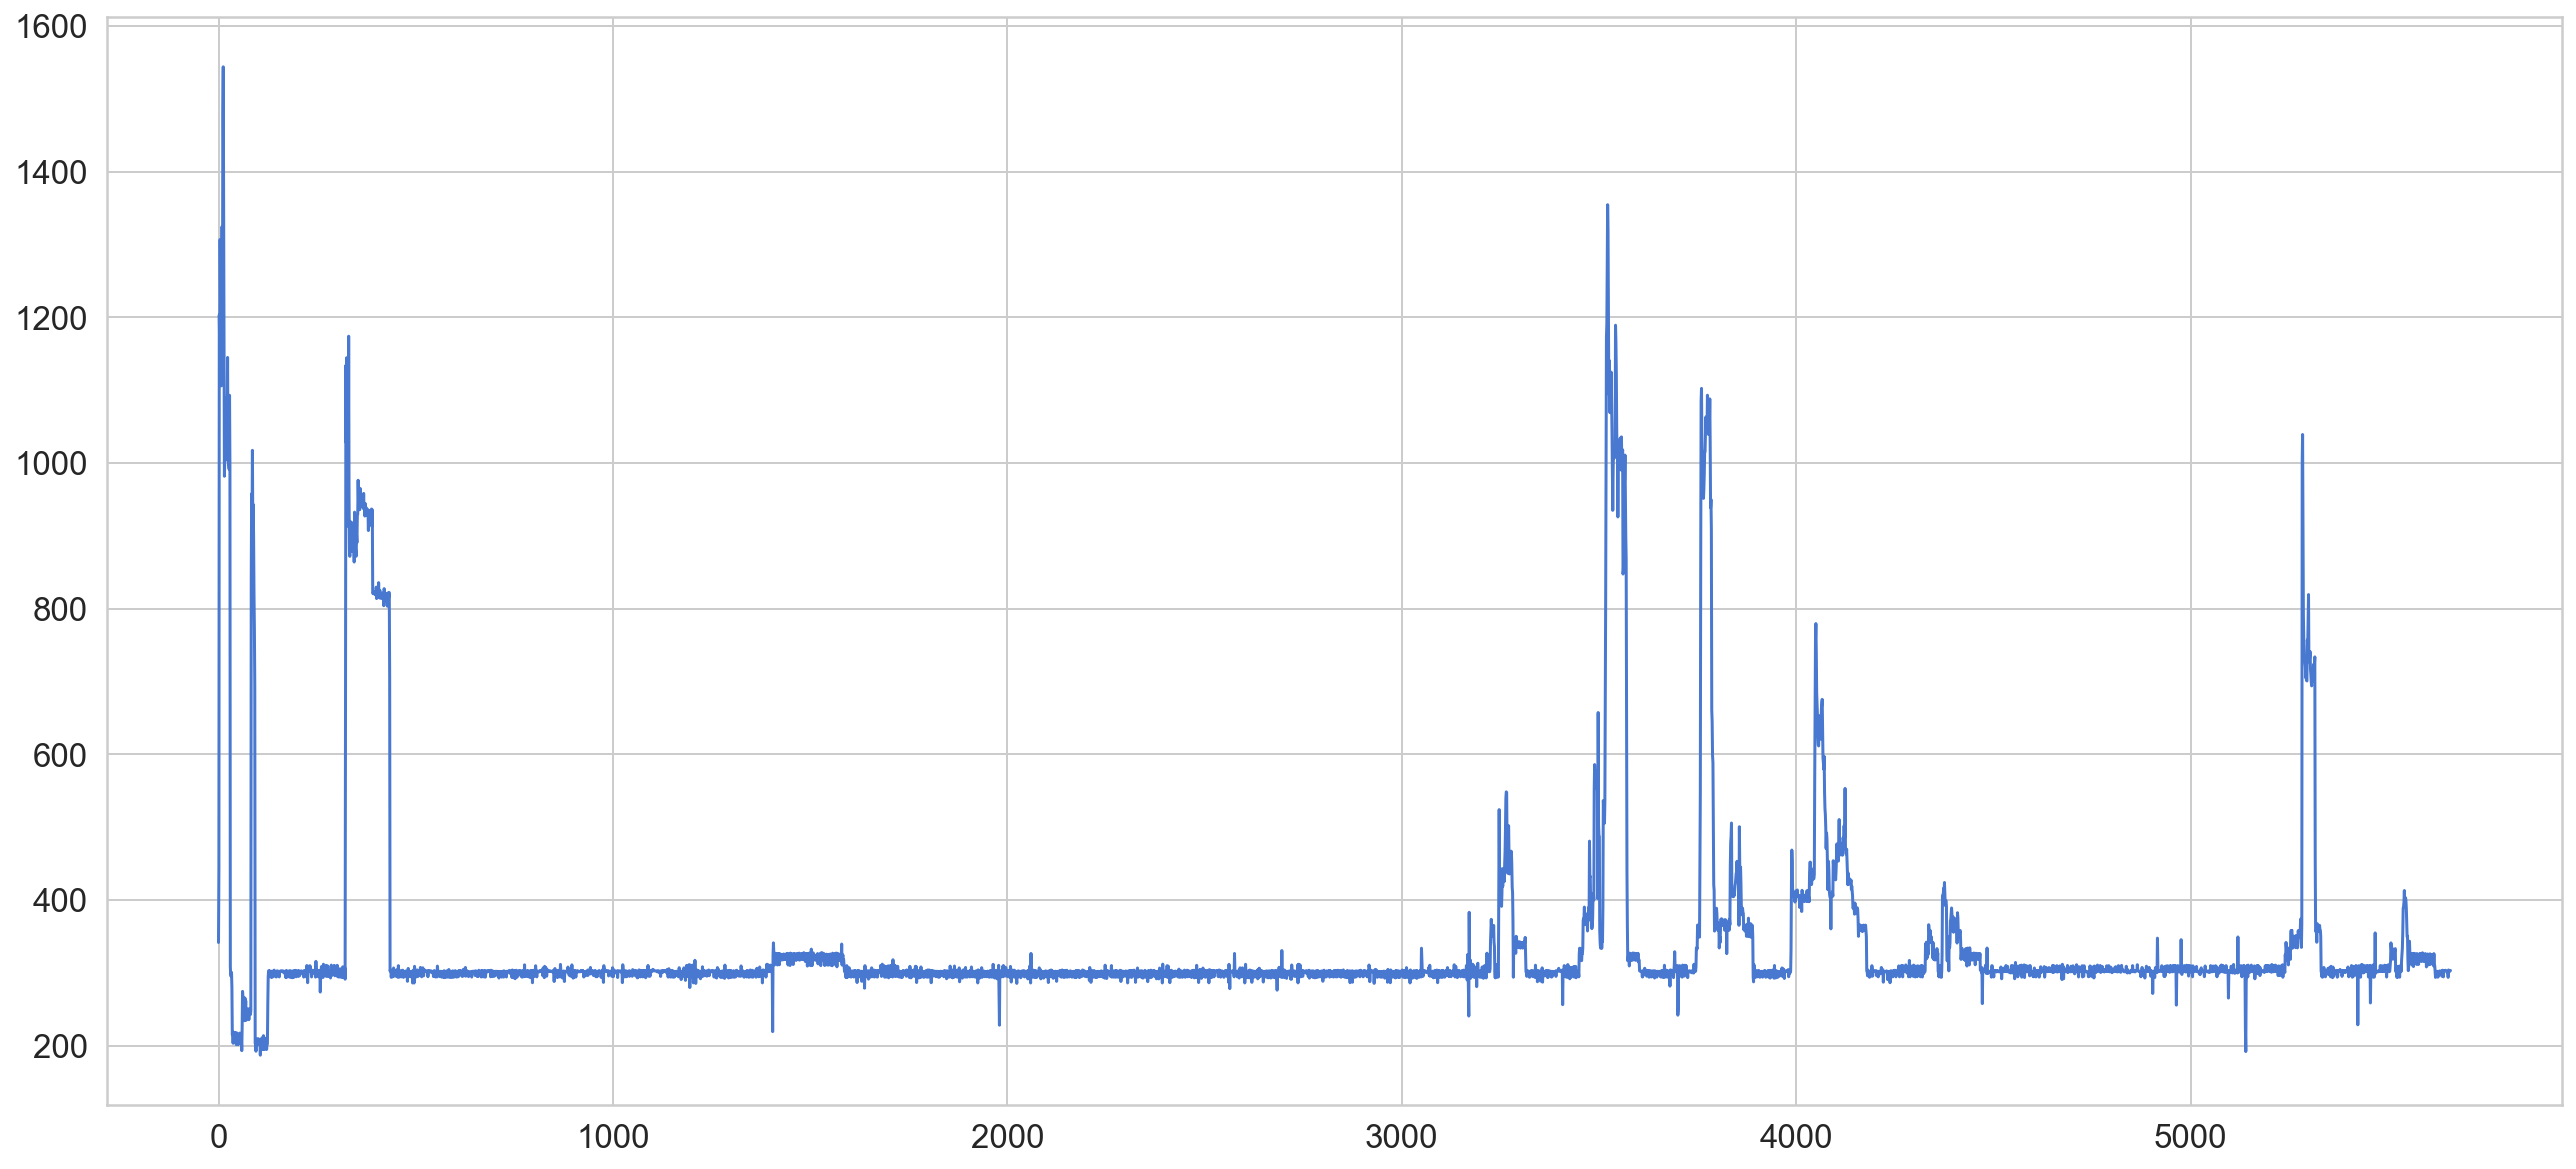

In [97]:
plt.plot(y)

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=2)
selector = selector.fit(xtrain, ytrain)
selector.support_

selector.ranking_

In [3]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

In [8]:
X_train.iloc[:,selector.ranking_]

tvoc_101   light_103   sound_102   sound_106  \
date                                                                  
2022-03-25 16:45:00   51.750000  632.333333  509.750000  507.000000   
2022-03-25 16:50:00   65.000000  630.250000  510.000000  506.666667   
2022-03-25 16:55:00  102.333333  614.333333  510.000000  506.333333   
2022-03-25 17:00:00  197.250000  601.000000  510.750000  507.500000   
2022-03-25 17:05:00  234.333333  598.750000  510.333333  508.000000   
...                         ...         ...         ...         ...   
2022-03-26 00:00:00  752.750000    0.000000  510.250000  507.666667   
2022-03-26 00:05:00  736.000000    0.000000  510.000000  507.000000   
2022-03-26 00:10:00  740.333333    0.000000  510.000000  508.000000   
2022-03-26 00:15:00  741.250000    0.000000  510.250000  507.666667   
2022-03-26 00:20:00  732.333333    0.000000  510.333333  507.666667   

                     sound_108  humidity_103     co2_102     co2_101  \
date                                                                   
2022-03-25 16:45:00      11.00     19.616667  421.500000  307.000000   
2022-03-25 16:50:00      11.00     19.540000  366.000000  308.000000   
2022-03-25 16:55:00      11.00     19.110000  415.333333  355.666667   
2022-03-25 17:00:00      11.00     18.173333  413.250000  338.750000   
2022-03-25 17:05:00      11.00     17.727500  411.666667  337.333333   
...                        ...           ...         ...         ...   
2022-03-26 00:00:00       6.00     22.876667  394.000000  326.500000   
2022-03-26 00:05:00       6.50     22.912500  397.666667  331.000000   
2022-03-26 00:10:00       6.50     22.916667  399.666667  330.666667   
2022-03-26 00:15:00       6.25     22.933333  399.250000  339.000000   
2022-03-26 00:20:00       6.00     22.942500  397.666667  339.000000   

                       tvoc_108   light_101  ...    tvoc_112    tvoc_100  \
date                                         ...                           
2022-03-25 16:45:00  141.000000  571.750000  ...  125.500000  101.750000   
2022-03-25 16:50:00  160.461538  568.666667  ...  127.333333  119.333333   
2022-03-25 16:55:00  179.923077  522.666667  ...  127.000000   88.000000   
2022-03-25 17:00:00  199.384615  447.750000  ...  154.000000  183.000000   
2022-03-25 17:05:00  218.846154  442.000000  ...  201.500000  230.666667   
...                         ...         ...  ...         ...         ...   
2022-03-26 00:00:00  781.666667    0.000000  ...  597.250000  784.250000   
2022-03-26 00:05:00  791.500000    0.000000  ...  596.000000  796.666667   
2022-03-26 00:10:00  777.500000    0.000000  ...  598.333333  798.333333   
2022-03-26 00:15:00  777.750000    0.000000  ...  598.750000  797.500000   
2022-03-26 00:20:00  796.333333    0.000000  ...  596.000000  809.333333   

                     humidity_104     co2_111     tvoc_105     co2_104  \
date                                                                     
2022-03-25 16:45:00     18.223333  433.500000    44.500000  391.333333   
2022-03-25 16:50:00     18.220000  438.000000    93.000000  388.000000   
2022-03-25 16:55:00     17.650000  440.250000   138.666667  414.000000   
2022-03-25 17:00:00     17.160000  431.250000   172.000000  411.666667   
2022-03-25 17:05:00     17.033333  443.750000   271.666667  411.333333   
...                           ...         ...          ...         ...   
2022-03-26 00:00:00     22.236667  419.750000  2368.666667  391.000000   
2022-03-26 00:05:00     22.287500  419.000000  2392.000000  391.250000   
2022-03-26 00:10:00     22.290000  421.333333  2335.333333  390.333333   
2022-03-26 00:15:00     22.283333  423.250000  2596.333333  394.333333   
2022-03-26 00:20:00     22.307500  417.000000  2390.500000  396.750000   

                       tvoc_103  humidity_102  temperature_107  sound_104  
date                                                                       
2022-03-25 16:45:00   27.666667     19.227500        26.41

In [26]:
colonesSelected = []
for i,j in enumerate(selector.ranking_):
    if j<3:
        colonesSelected.append(i)

In [28]:
var=X.columns[colonesSelected]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [28]:
var

Index(['co2_100', 'tvoc_100', 'temperature_100', 'humidity_100', 'light_100',
       'sound_100', 'co2_101', 'tvoc_101', 'temperature_101', 'humidity_101',
       'light_101', 'sound_101', 'co2_102', 'tvoc_102', 'temperature_102',
       'humidity_102', 'light_102', 'sound_102', 'co2_103', 'tvoc_103',
       'temperature_103', 'humidity_103', 'light_103', 'sound_103', 'co2_104',
       'tvoc_104', 'temperature_104', 'humidity_104', 'light_104', 'sound_104',
       'co2_105', 'tvoc_105', 'temperature_105', 'humidity_105', 'light_105',
       'sound_105', 'co2_106', 'tvoc_106', 'temperature_106', 'humidity_106',
       'light_106', 'sound_106', 'co2_107', 'tvoc_107', 'temperature_107',
       'humidity_107', 'light_107', 'sound_107', 'co2_108', 'tvoc_108',
       'temperature_108', 'humidity_108', 'light_108', 'sound_108', 'co2_110',
       'temperature_110', 'humidity_110', 'co2_111', 'tvoc_111',
       'temperature_111', 'humidity_111', 'light_111', 'sound_111', 'co2_112',
       'tvoc

In [30]:
var =Index(['temperature_103', 'light_103', 'sound_103', 'temperature_104',
       'light_104', 'light_105', 'light_106', 'temperature_107', 'light_107',
       'tvoc_108', 'sound_108', 'temperature_110', 'temperature_112'],
      dtype='object')

NameError: name 'Index' is not defined

In [31]:
import pandas
from sklearn import linear_model
var = ['temperature_103', 'light_103', 'sound_103', 'temperature_104',
       'light_104', 'light_105', 'light_106', 'temperature_107', 'light_107',
       'tvoc_108', 'sound_108', 'temperature_110', 'temperature_112']
X = X[var].copy()
print(X.columns)
col = [0, 4, 5, 7, 8, 9, 13, 14, 15, 17, 18, 21, 25, 26, 29, 30, 32, 33, 34, 35, 36]
col = [0, 4, 5, 7,  9, 13, 15, 18, 21, 26,  30]
col2    =[0, 1, 2, 3, 4, 5,6,  8, 10, 11, 13, 14,15]
# X= X[col]
#X= X.iloc[:,col]
y = y
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = X_train.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datascaler=scaler.fit(X_train)
X_train= datascaler.transform(X_train)
X_test= datascaler.transform(X_test)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


print(regr.coef_) 

Index(['temperature_103', 'light_103', 'sound_103', 'temperature_104',
       'light_104', 'light_105', 'light_106', 'temperature_107', 'light_107',
       'tvoc_108', 'sound_108', 'temperature_110', 'temperature_112'],
      dtype='object')
[ -31.85655949    0.39705617    1.37316386   28.67866623  -80.1824087
  200.28676444   32.27412896   86.48902384 -130.81588662   30.23545502
  -10.00178993    9.35677043  -35.27020961]


In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                             
Dep. Variable:     elecWithoutEclairage   R-squared:                       0.427
Model:                              OLS   Adj. R-squared:                  0.426
Method:                   Least Squares   F-statistic:                     517.5
Date:                  Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                          08:25:14   Log-Likelihood:                -55248.
No. Observations:                  9055   AIC:                         1.105e+05
Df Residuals:                      9041   BIC:                         1.106e+05
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        355.2967      1.136

In [23]:
lm = linear_model.LinearRegression()
X, y=X_train, y_train
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0       413.8061            1.374   301.197          0.000
1       -40.0663            2.607   -15.369          0.000
2       -67.3688            7.020    -9.597          0.000
3        -0.2406            1.410    -0.171          0.865
4        60.3624            4.207    14.347          0.000
5       127.9070           16.917     7.561          0.000
6       -81.9228           25.722    -3.185          0.001
7       647.7970            9.608    67.424          0.000
8       106.9280            7.267    14.715          0.000
9      -521.7278           16.696   -31.248          0.000
10       40.9044            1.891    21.627          0.000
11       -6.3926            1.767    -3.618          0.000
12        0.1784            1.751     0.102          0.919
13      -56.7691            5.568   -10.195          0.000


In [ ]:
col= []
for i,pval in enumerate(myDF3["Probabilities"]):
    if pval<=0.00001:
        col.append(i-1)
col   = col[1:] 

In [ ]:
col

In [ ]:
X_train

In [ ]:
X

In [24]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 socre is ",score)
print("mean_sqrd_error is ",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is  0.7863691726246336
mean_sqrd_error is  16006.476687800314
root_mean_squared error of is  126.51670517287555


In [ ]:
d = {'y_pred': y_pred, 'y_test': y_test}
dfplot= pd.DataFrame(data=d)
dfplot.plot()


## Missing data generation

In [ ]:
#!pip install torch
#!pip install wget 
import wget
#wget.download('https://raw.githubusercontent.com/BorisMuzellec/MissingDataOT/master/utils.py')

import numpy as np
import pandas as pd
from utils import *
import torch
import seaborn as sns

In [ ]:
df1 = df.copy()



In [ ]:
df.plot()

In [ ]:
#!pip install category_encoders
import category_encoders as ce
# Get a new clean dataframe
obj_df = df1.select_dtypes(include=['object']).copy()

In [ ]:
df1 = obj_df.replace(x)

In [ ]:
df1.plot()

In [ ]:
# Fix the seed ------------------------------------------------------
np.random.seed(2)

In [ ]:
# Function produce_NA for generating missing values ------------------------------------------------------

def produce_NA(X, p_miss, mecha="MCAR", opt=None, p_obs=None, q=None):
    """
    Generate missing values for specifics missing-data mechanism and proportion of missing values. 
    
    Parameters
    ----------
    X : torch.DoubleTensor or np.ndarray, shape (n, d)
        Data for which missing values will be simulated.
        If a numpy array is provided, it will be converted to a pytorch tensor.
    p_miss : float
        Proportion of missing values to generate for variables which will have missing values.
    mecha : str, 
            Indicates the missing-data mechanism to be used. "MCAR" by default, "MAR", "MNAR" or "MNARsmask"
    opt: str, 
         For mecha = "MNAR", it indicates how the missing-data mechanism is generated: using a logistic regression ("logistic"), quantile censorship ("quantile") or logistic regression for generating a self-masked MNAR mechanism ("selfmasked").
    p_obs : float
            If mecha = "MAR", or mecha = "MNAR" with opt = "logistic" or "quanti", proportion of variables with *no* missing values that will be used for the logistic masking model.
    q : float
        If mecha = "MNAR" and opt = "quanti", quantile level at which the cuts should occur.
    
    Returns
    ----------
    A dictionnary containing:
    'X_init': the initial data matrix.
    'X_incomp': the data with the generated missing values.
    'mask': a matrix indexing the generated missing values.s
    """
    
    to_torch = torch.is_tensor(X) ## output a pytorch tensor, or a numpy array
    if not to_torch:
        X = X.astype(np.float32)
        X = torch.from_numpy(X)
    
    if mecha == "MAR":
        mask = MAR_mask(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "logistic":
        mask = MNAR_mask_logistic(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "quantile":
        mask = MNAR_mask_quantiles(X, p_miss, q, 1-p_obs).double()
    elif mecha == "MNAR" and opt == "selfmasked":
        mask = MNAR_self_mask_logistic(X, p_miss).double()
    else:
        mask = (torch.rand(X.shape) < p_miss).double()
    
    X_nas = X.clone()
    X_nas[mask.bool()] = np.nan
    
    return {'X_init': X.double(), 'X_incomp': X_nas.double(), 'mask': mask}

In [ ]:
X = df.copy()
shelly_219 =  ['state_AA7BF5','state_AA4706', 'state_AA9130', 'state_483FDA81E0F4']
for shelly in shelly_219:
    X = X.drop([shelly ], axis=1)

In [ ]:
X.columns

In [ ]:
X = X.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datascaler=scaler.fit(X)
X= datascaler.transform(X)

In [ ]:
import pandas as pd
df= pd.DataFrame(X)
df.index=data.index

In [ ]:
df.head()

In [ ]:
#df.to_csv('dataComplet_219.csv')

## MCAR Generation

In [ ]:
# Minimal example for generating missing data ------------------------
p='5.csv'
X_miss_mcar = produce_NA(X, p_miss=0.05, mecha="MCAR")
X_mcar = X_miss_mcar['X_incomp']
R_mcar = X_miss_mcar['mask']

print("Percentage of newly generated missing values: ", (R_mcar.sum()).numpy()/np.prod(R_mcar.size())*100, " %")

df = X_mcar
df = df.numpy()
mask=R_mcar
mask = mask.numpy()

df = pd.DataFrame(data=df, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])
mask = pd.DataFrame(data=mask, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])

df['time']= data.index
df.set_index('time',inplace = True)
mask['time']= data.index
mask.set_index('time',inplace = True)
df.to_csv('MCAR'+p)
mask.to_csv('mask'+p)

In [ ]:
#df.to_csv('MCAR25.csv')
# supprimer d'abord les deux lignes dans le fichier d'export Neatatmo
index_col="time"
df=pd.read_csv('MCAR40.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col)
mask=pd.read_csv('mask40.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col)
mask=mask.values


In [ ]:
# Sample mar data -----------------------------------------
X_miss_mar = produce_NA(X, p_miss=0.4, mecha="MAR", p_obs=0.4)

X_mar = X_miss_mar['X_incomp']
R_mar = X_miss_mar['mask']

print("Percentage of generated missing values: ", (R_mar.sum()).numpy()/np.prod(R_mar.size())*100, " %")

ax = sns.heatmap(X_mar, mask=R_mar.numpy()==1, linewidths=0.02, linecolor='black')

df = X_mar
df = df.numpy()
mask_mar = R_mar
mask_mar = mask_mar.numpy()

df = pd.DataFrame(data=df, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])
mask_mar = pd.DataFrame(data=mask_mar, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])



In [ ]:
# df['time']= data.index
# df.set_index('time',inplace = True)
# mask_mar['time'] = data.index
# mask_mar.set_index('time',inplace = True)
# df.to_csv('MAR'+p)
# mask_mar.to_csv('mask_mar'+p)

In [ ]:
# Minimal example for generating missing data ------------------------
p='5.csv'

In [ ]:
pourcentage=5
p=